In [57]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("shotcharts-2018-19.csv")
df.head()

,Unnamed: 0,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,0,Shot Chart Detail,21800001,114,201143,Al Horford,1610612738,Boston Celtics,1,3,...,Center(C),Less Than 8 ft.,2,24,-1,1,1,20181016,BOS,PHI
1,1,Shot Chart Detail,21800001,271,201143,Al Horford,1610612738,Boston Celtics,2,5,...,Center(C),Less Than 8 ft.,1,-2,11,1,1,20181016,BOS,PHI
2,2,Shot Chart Detail,21800001,308,201143,Al Horford,1610612738,Boston Celtics,2,2,...,Center(C),Less Than 8 ft.,1,-9,7,1,1,20181016,BOS,PHI
3,3,Shot Chart Detail,21800001,353,201143,Al Horford,1610612738,Boston Celtics,3,11,...,Left Side(L),8-16 ft.,12,-114,53,1,1,20181016,BOS,PHI
4,4,Shot Chart Detail,21800001,580,201143,Al Horford,1610612738,Boston Celtics,4,7,...,Center(C),Less Than 8 ft.,6,40,57,1,0,20181016,BOS,PHI


In [23]:
# df.groupby(by=["PLAYER_ID","ACTION_TYPE"])['SHOT_ATTEMPTED_FLAG'].agg(['sum'])
dfg = df.groupby(by=["PLAYER_ID", "PLAYER_NAME","ACTION_TYPE"], as_index=False).agg({'SHOT_ATTEMPTED_FLAG':'sum', 
                         'SHOT_MADE_FLAG':'sum', 
                         'SHOT_DISTANCE':'mean'})


In [46]:
dfg['FG%'] = dfg.SHOT_MADE_FLAG/ dfg.SHOT_ATTEMPTED_FLAG
# dfg['FGA'] = dfg.groupby(by="PLAYER_ID").agg({'SHOT_ATTEMPTED_FLAG':'sum'})
tfga = dfg.groupby(by="PLAYER_ID").agg({'SHOT_ATTEMPTED_FLAG':'sum'}).rename(columns={'SHOT_ATTEMPTED_FLAG':'Total_FGA'})
dfg= dfg.merge(tfga, on="PLAYER_ID")
dfg['TYPE_FGA_%_TOTAL'] = dfg.SHOT_ATTEMPTED_FLAG / dfg.Total_FGA


AttributeError: 'DataFrame' object has no attribute 'Total_FGA'

In [47]:
dfg[dfg.PLAYER_NAME == "Aaron Gordon"]

,PLAYER_ID,PLAYER_NAME,ACTION_TYPE,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,SHOT_DISTANCE,FG%,Total_FGA_x,TYPE_FGA_%_TOTAL,idx,Total_FGA_y
4145,203932,Aaron Gordon,Alley Oop Dunk Shot,3,3,0.666667,1.000000,289,0.010381,1,289
4146,203932,Aaron Gordon,Cutting Dunk Shot,11,9,1.000000,0.818182,289,0.038062,2,289
4147,203932,Aaron Gordon,Cutting Finger Roll Layup Shot,1,1,1.000000,1.000000,289,0.003460,3,289
4148,203932,Aaron Gordon,Cutting Layup Shot,3,2,1.000000,0.666667,289,0.010381,4,289
4149,203932,Aaron Gordon,Driving Bank Hook Shot,1,0,3.000000,0.000000,289,0.003460,5,289
4150,203932,Aaron Gordon,Driving Dunk Shot,5,5,1.000000,1.000000,289,0.017301,6,289
4151,203932,Aaron Gordon,Driving Floating Jump Shot,2,0,5.500000,0.000000,289,0.006920,7,289
4152,203932,Aaron Gordon,Driving Hook Shot,1,0,8.000000,0.000000,289,0.003460,8,289
4153,203932,Aaron Gordon,Driving Layup Shot,23,14,1.913043,0.608696,289,0.079585,9,289
4154,203932,Aaron Gordon,Driving Reverse Dunk Shot,1,1,0.000000,1.000000,289,0.003460,10,289


In [42]:
dfg['idx'] = (dfg.groupby(['PLAYER_NAME']).cumcount() + 1).astype(str)

df1 = (dfg.pivot_table(index=['PLAYER_NAME'], 
                      columns=['ACTION_TYPE'], 
                      values=['SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'SHOT_DISTANCE'], 
                      aggfunc='first'))
df1.columns = [''.join(col) for col in df1.columns]
df1 = df1.reset_index()

In [50]:
df1.fillna(0, inplace=True)
df1

,PLAYER_NAME,SHOT_ATTEMPTED_FLAGAlley Oop Dunk Shot,SHOT_ATTEMPTED_FLAGAlley Oop Layup shot,SHOT_ATTEMPTED_FLAGCutting Dunk Shot,SHOT_ATTEMPTED_FLAGCutting Finger Roll Layup Shot,SHOT_ATTEMPTED_FLAGCutting Layup Shot,SHOT_ATTEMPTED_FLAGDriving Bank Hook Shot,SHOT_ATTEMPTED_FLAGDriving Dunk Shot,SHOT_ATTEMPTED_FLAGDriving Finger Roll Layup Shot,SHOT_ATTEMPTED_FLAGDriving Floating Bank Jump Shot,...,SHOT_MADE_FLAGRunning Reverse Layup Shot,SHOT_MADE_FLAGStep Back Bank Jump Shot,SHOT_MADE_FLAGStep Back Jump shot,SHOT_MADE_FLAGTip Dunk Shot,SHOT_MADE_FLAGTip Layup Shot,SHOT_MADE_FLAGTurnaround Bank Hook Shot,SHOT_MADE_FLAGTurnaround Fadeaway Bank Jump Shot,SHOT_MADE_FLAGTurnaround Fadeaway shot,SHOT_MADE_FLAGTurnaround Hook Shot,SHOT_MADE_FLAGTurnaround Jump Shot
0,Aaron Gordon,3.0,0.0,11.0,1.0,3.0,1.0,5.0,0.0,0.0,...,0.0,1.0,6.0,2.0,2.0,0.0,2.0,5.0,1.0,2.0
1,Aaron Holiday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,2.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Abdel Nader,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Al Horford,5.0,4.0,6.0,0.0,4.0,0.0,5.0,2.0,1.0,...,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,5.0,1.0
4,Al-Farouq Aminu,0.0,0.0,4.0,0.0,3.0,0.0,3.0,2.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0
5,Alec Burks,0.0,0.0,1.0,0.0,4.0,0.0,1.0,8.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,Alex Abrines,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Alex Len,7.0,2.0,15.0,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,3.0,0.0
8,Alex Poythress,2.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
9,Alfonzo McKinnie,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
from sklearn.preprocessing import StandardScaler
# features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# # Separating out the features
x = df1.iloc [:, 1:].values
# # Separating out the target
# y = df.loc[:,['target']].values
# # Standardizing the features
x = StandardScaler().fit_transform(x)

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])


principalDf


,pc1,pc2
0,10.221304,2.113181
1,-3.798115,-1.424319
2,-5.354469,1.254148
3,1.956839,2.801792
4,-0.579628,-0.802857
5,-1.003633,-2.238477
6,-3.998969,-1.479829
7,2.589440,7.081975
8,-2.679456,2.510288
9,-1.585645,1.286618


In [59]:
finalDf = pd.concat([principalDf, df1[['PLAYER_NAME']]], axis = 1)

In [60]:
finalDf

,pc1,pc2,PLAYER_NAME
0,10.221304,2.113181,Aaron Gordon
1,-3.798115,-1.424319,Aaron Holiday
2,-5.354469,1.254148,Abdel Nader
3,1.956839,2.801792,Al Horford
4,-0.579628,-0.802857,Al-Farouq Aminu
5,-1.003633,-2.238477,Alec Burks
6,-3.998969,-1.479829,Alex Abrines
7,2.589440,7.081975,Alex Len
8,-2.679456,2.510288,Alex Poythress
9,-1.585645,1.286618,Alfonzo McKinnie


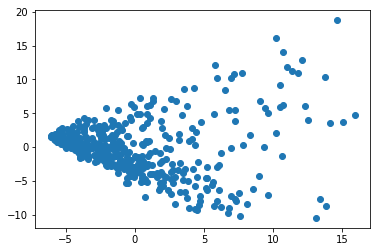

In [61]:
plt.scatter(finalDf.pc1, finalDf.pc2)

In [67]:
from sklearn.metrics.pairwise import linear_kernel
df2 = df1.iloc [:, 1:].values

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(df2, df2)


array([[ 3.,  0., 11., ...,  5.,  1.,  2.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  1.,  4., ...,  1.,  3.,  2.],
       [ 1.,  0.,  6., ...,  7.,  0.,  4.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.]])

In [100]:
# indices = pd.Series(df2.index, index=df2['PLAYER_NAME']).drop_duplicates()
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = df1[df1.PLAYER_NAME == title].index[0]
    print(idx)
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
   
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[0:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the top 10 most similar movies
    return df1['PLAYER_NAME'].iloc[movie_indices]

In [107]:
get_recommendations("Carmelo Anthony")

48


243       Klay Thompson
324         Paul George
383    Tim Hardaway Jr.
164           JJ Redick
230        Kemba Walker
221      Justin Holiday
374       Terrence Ross
217     Josh Richardson
36         Bradley Beal
309      Nikola Mirotic
235        Kevin Durant
Name: PLAYER_NAME, dtype: object